In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Before applying Cann Algo--

1. Remove noise from image by applying Gaussian Blurring
2. Apply non max suppression to get rid of spurious response to edge det.
3. Apply double threshold to determine potential edges
4. Track edge by hystersis: Finalize edges by supressing edges that are weak 
   and not connected to strong edges

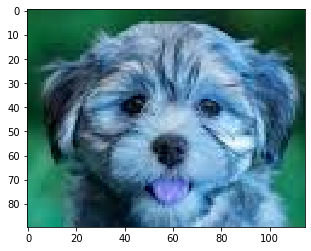

In [12]:
d = cv2.imread('doggy.jpg')
face = d.copy()[10:100,50:165]
plt.imshow(face)

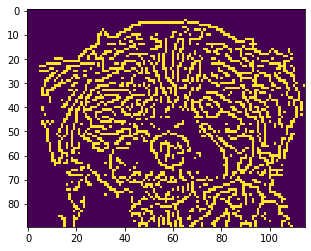

In [15]:
edges = cv2.Canny(face.copy(),
                  threshold1=127,
                  threshold2=127
                 )

plt.imshow(edges)

As we can see not a good o/p for edge detection

In [16]:
med_val = np.median(face)

In [17]:
med_val

104.0

In [18]:
#Lower Threshold
lower = int(max (0 , 0.7*med_val))
#Upper Threshold
upper = int(min (255 , 0.3*med_val))

In [19]:
lower,upper

(72, 31)

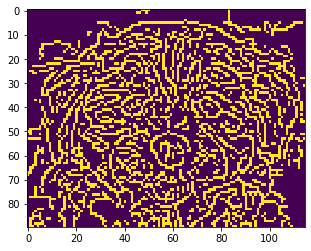

In [20]:
edges = cv2.Canny(face.copy(),
                  threshold1=lower,
                  threshold2=upper
                 )

plt.imshow(edges)

As we can see not a good o/p for edge detection

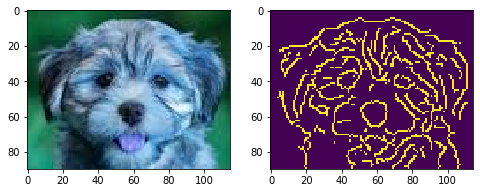

In [32]:
#try with BLUR
blurred_face = cv2.blur(face.copy(), ksize=(5,5))
edges = cv2.Canny(blurred_face.copy(),
                  threshold1=lower,
                  threshold2=upper+75
                 )

plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(face)
plt.subplot(122)
plt.imshow(edges)